## Исследовать данные из файла data.csv по схеме последнего занятия. Выбрать столбцы с номерами: с `N1` - ваш номер в списке `*10` по `N2` - ваш номер в списке `*10+9`


### Импортируем данные и вытащим необходимые нам столбцы (`30 - 39`)

In [1]:
import pandas as pd
dataset = pd.read_csv('data/xdata.csv', ';')
df = pd.DataFrame(dataset)
columns = [0,30,31,32,33,34,35,36,37,38,39]
df = df[df.columns[columns]]
df.columns = ['Timestamp',1,2,3,4,5,6,7,8,9,10]
df.head()

,Timestamp,1,2,3,4,5,6,7,8,9,10
0,2018-09-28 20:00:00,32092.791016,29262.344019,47727.073630,38824.267188,3818.899863,47502.585143,4521.373496,43686.677651,4585.855135,4156.694482
1,2018-09-29 08:00:00,35057.264453,35923.336283,47298.191778,39697.103438,3978.988350,47120.086501,4518.603652,43654.753893,4629.502575,4140.967943
2,2018-09-29 20:15:00,39428.552187,24963.650391,47582.408901,38991.664375,3997.021162,47339.528522,4520.618086,43663.354034,6193.919578,5628.863965
3,2018-09-30 08:00:00,43014.232031,30671.071504,47773.929944,37215.618125,3980.907031,47564.996414,4533.796230,43650.419454,5460.792391,4937.758424
4,2018-09-30 20:00:00,43014.232031,32169.453535,47682.166291,38326.879844,4068.958408,47419.867008,4522.632617,43819.464050,5135.336061,4606.521181


### Нарисуем график значений

<AxesSubplot:title={'center':'Показатели всех графиков'}, xlabel='Timestamp'>

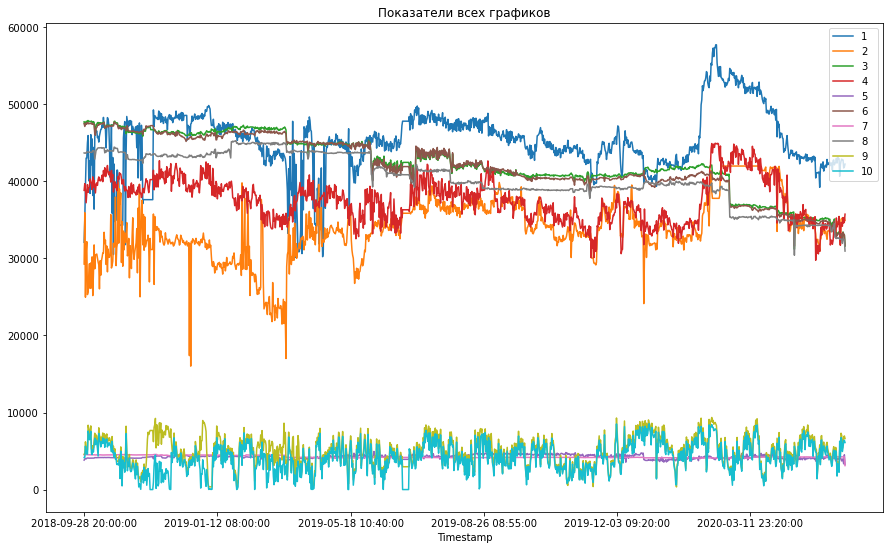

In [2]:
df.plot(x='Timestamp', kind='line', title = 'Показатели всех графиков', figsize=(15,9))

### Посмотрим на основные данные с датафрейма

In [3]:
df.describe()

,1,2,3,4,5,6,7,8,9,10
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,45286.863165,33935.957332,42398.579091,37596.998104,4253.177918,42085.293330,4247.320726,40480.640147,4974.902580,4173.563899
std,3996.612502,4055.441349,3678.192331,2835.623447,242.316483,3735.955657,149.561118,3243.249820,1936.771444,1909.462997
min,30121.656000,16019.523049,31176.352098,29758.147600,3257.504000,31575.457115,3109.504400,30412.834951,342.882000,0.000000
25%,43216.359600,31990.384115,40781.074361,35350.826600,4092.128800,40269.965098,4150.390000,38933.173066,3539.188421,2946.369474
50%,45306.794800,33841.830295,41967.883508,37625.969200,4260.415200,41775.263574,4176.936000,39883.143475,4982.370842,4159.573789
75%,47632.736000,36414.062213,46074.747869,39520.695200,4426.556600,45552.683410,4417.143800,43627.812366,6403.122526,5563.331737
max,57717.390000,41984.070000,47881.278066,44938.120000,4944.710800,47684.811574,4646.566400,45281.181803,9354.826000,8547.271789


### Так как медиана отсутствует, найдём её по столбцам

In [4]:
for i in range(1,11):
    print(f"Медиана для столбца {i} равна {df.iloc[:, i].median()}")

Медиана для столбца 1 равна 45306.7948
Медиана для столбца 2 равна 33841.83029508197
Медиана для столбца 3 равна 41967.883508196726
Медиана для столбца 4 равна 37625.969200000014
Медиана для столбца 5 равна 4260.4152
Медиана для столбца 6 равна 41775.263573770506
Медиана для столбца 7 равна 4176.936
Медиана для столбца 8 равна 39883.14347540985
Медиана для столбца 9 равна 4982.370842105263
Медиана для столбца 10 равна 4159.573789473685


### Посмотрим на корреляцию между столбцами

In [5]:
df.corr()

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.456118,-0.114940,0.599293,0.211941,-0.113846,-0.076975,-0.171015,0.077221,0.074283
2,0.456118,1.000000,-0.577333,0.366124,0.160586,-0.549398,-0.516727,-0.600168,0.014001,0.147230
3,-0.114940,-0.577333,1.000000,0.236341,0.016268,0.993487,0.592775,0.981228,0.021774,-0.177532
4,0.599293,0.366124,0.236341,1.000000,0.107314,0.264886,0.240486,0.158380,0.132735,0.020359
5,0.211941,0.160586,0.016268,0.107314,1.000000,0.056741,-0.065032,0.004407,-0.117569,-0.080937
6,-0.113846,-0.549398,0.993487,0.264886,0.056741,1.000000,0.591823,0.975730,0.006726,-0.195786
7,-0.076975,-0.516727,0.592775,0.240486,-0.065032,0.591823,1.000000,0.516476,0.017862,-0.213113
8,-0.171015,-0.600168,0.981228,0.158380,0.004407,0.975730,0.516476,1.000000,-0.010285,-0.190117
9,0.077221,0.014001,0.021774,0.132735,-0.117569,0.006726,0.017862,-0.010285,1.000000,0.811192
10,0.074283,0.147230,-0.177532,0.020359,-0.080937,-0.195786,-0.213113,-0.190117,0.811192,1.000000


### Взглянем ещё раз на график

<AxesSubplot:title={'center':'Показатели всех графиков'}, xlabel='Timestamp'>

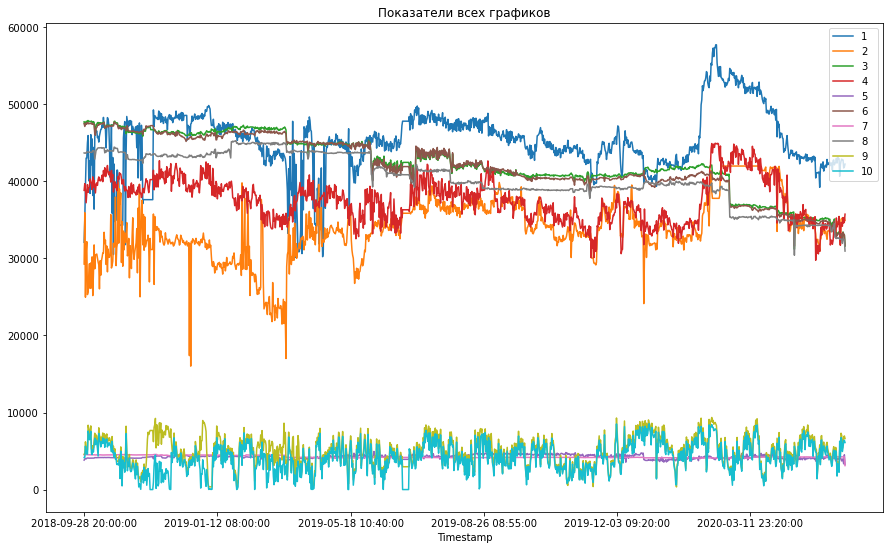

In [6]:
df.plot(x='Timestamp', kind='line', title = 'Показатели всех графиков', figsize=(15,9))

### Данные корреляции

#### Данные изменяются *почти* одновременно

3, 6 и 8 столбец действительно очень сильно коррелируют между собой, их корреляция близка к единице

#### Данные изменяются *довольно таки* одновременно

1 и 4 столбец имеют корреляцию `0.599293`, 3 и 7 - `0.592775`, 6 и 7 - `0.591823`, 9 и 10 - `0.811192`

#### Данные изменяются противоположно

2 и 3 столбец с отрицательной корреляцией `-0.577333`, 2 и 6 - `-0.549398`, 2 и 7 - `-0.516727`


### Посмотрим на распределение значений для каждого столбца

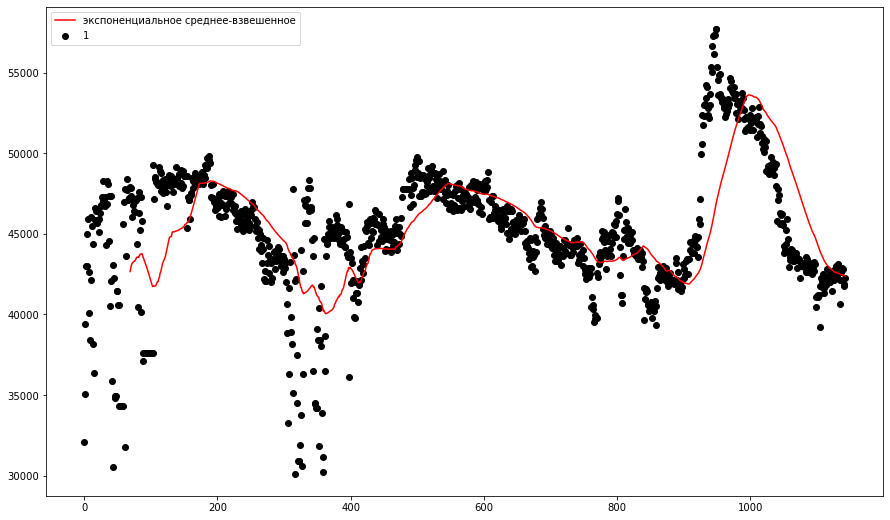

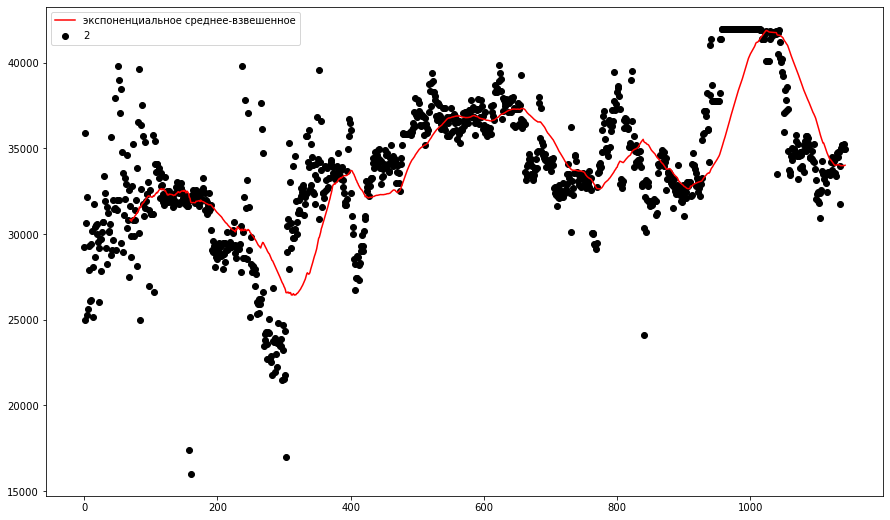

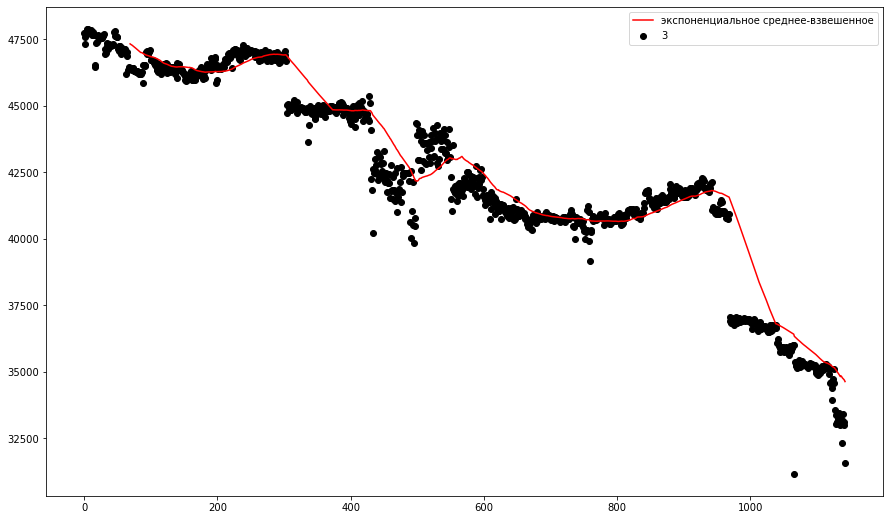

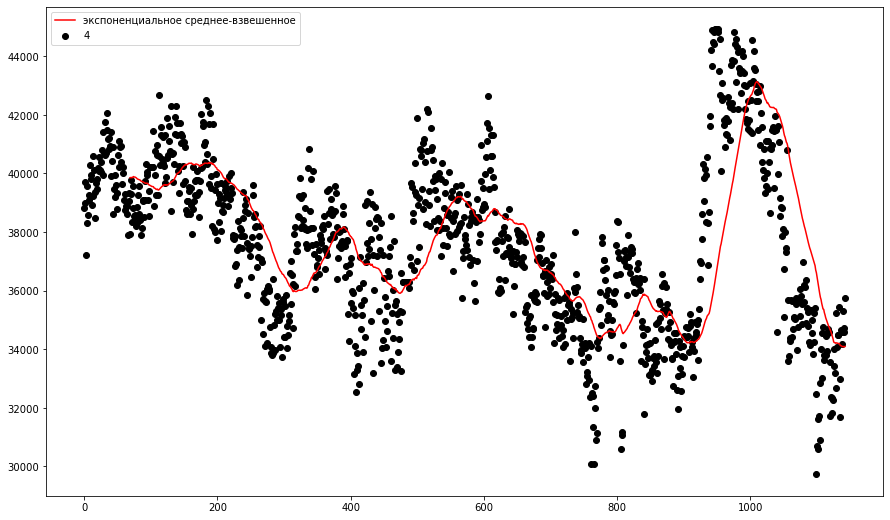

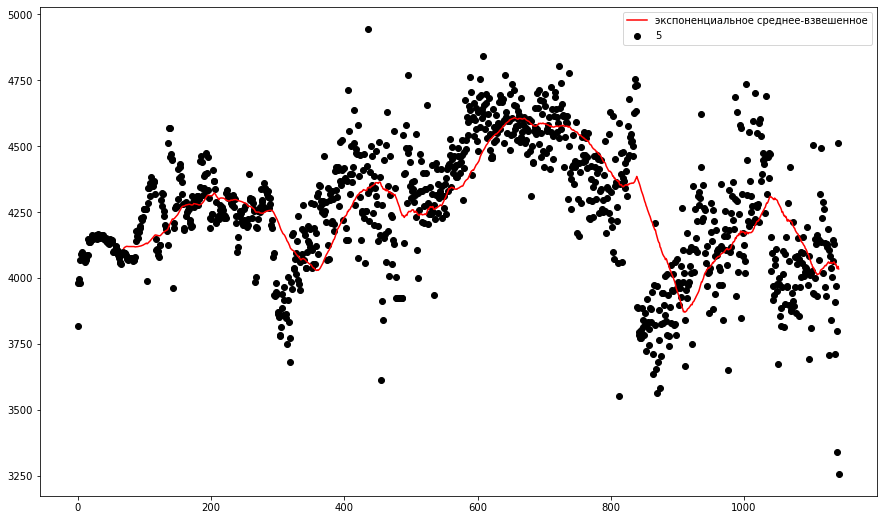

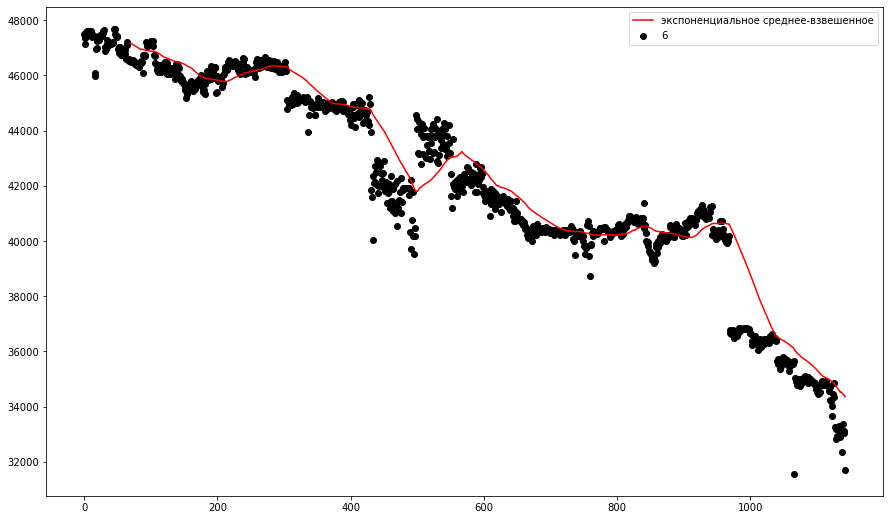

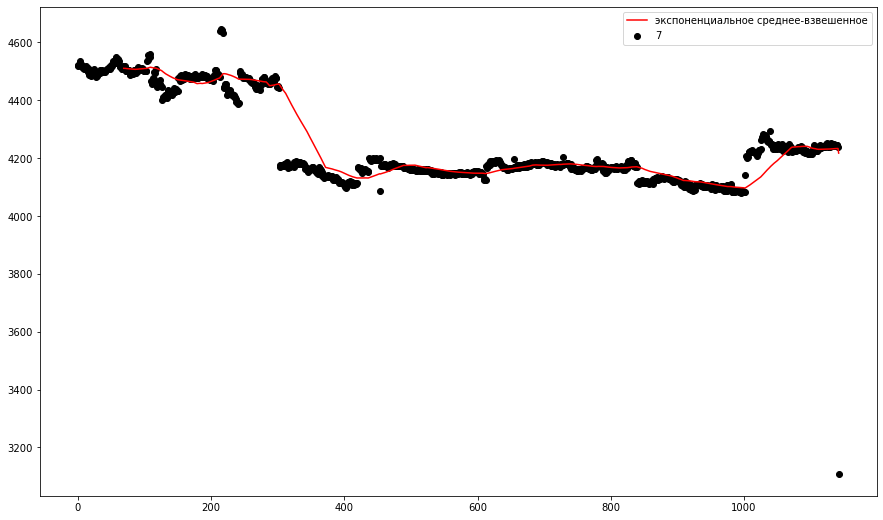

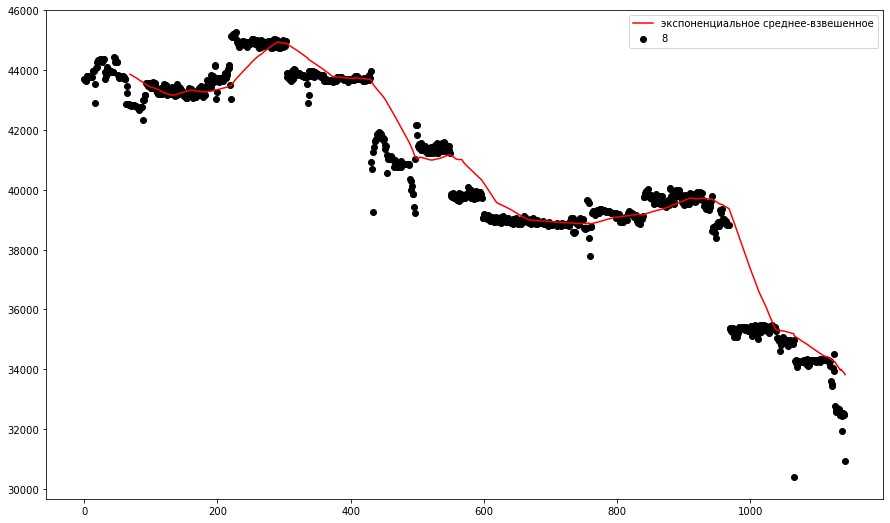

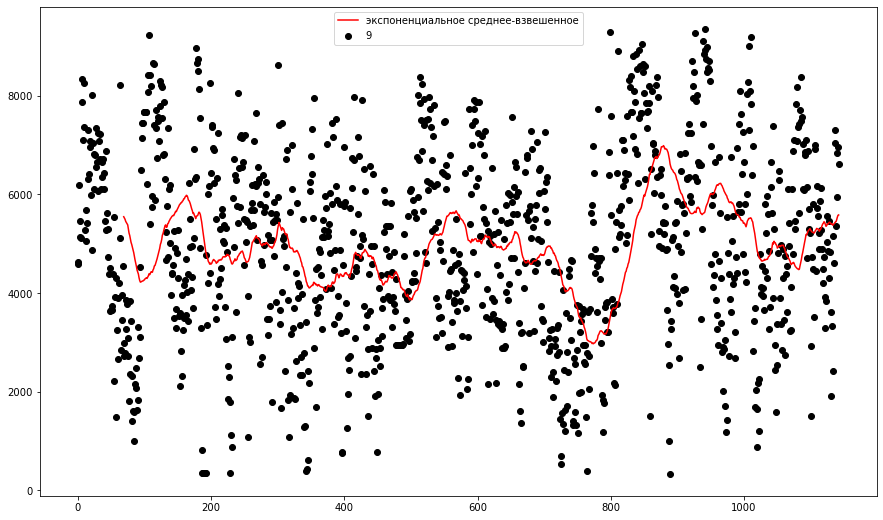

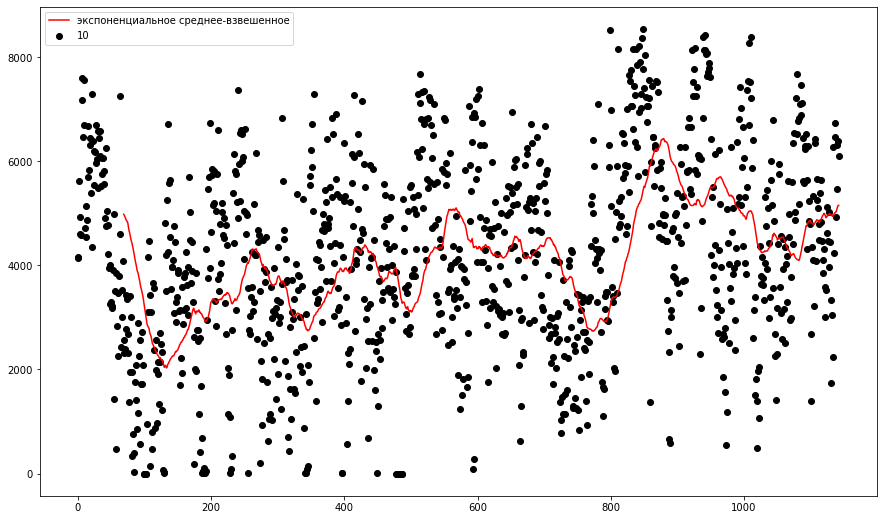

In [7]:
import matplotlib.pyplot as plt

columns = [1,2,3,4,5,6,7,8,9,10]
df = df[df.columns[columns]]

for column in df.columns:
    fig, axs = plt.subplots(figsize = (15, 9))
    plt.scatter(range(df.shape[0]), df[column], color = 'black', label = column)
    plt.plot(df[column].rolling(window=70).mean(), color = 'red', label = 'экспоненциальное среднее-взвешенное')
    axs.legend()
    plt.show()

## Построить регрессию с данными из ts.csv


### Считаем данные, импортируем зависимости

<AxesSubplot:>

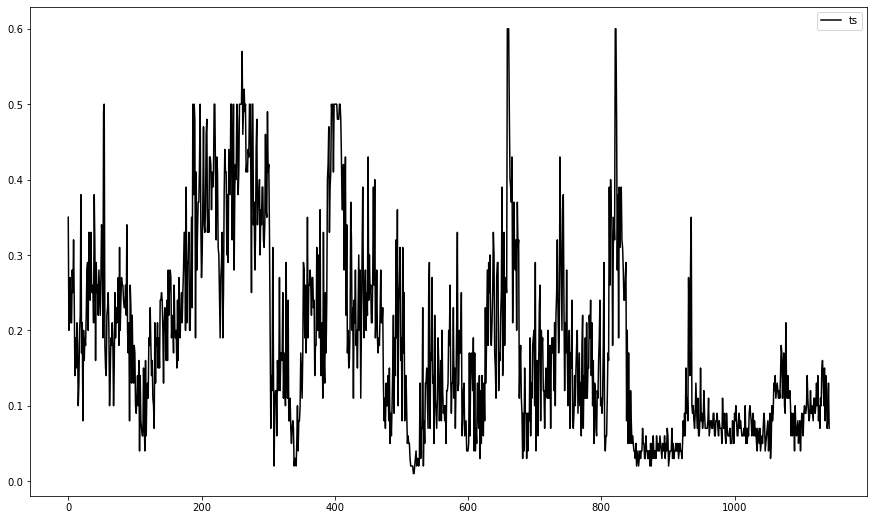

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

target = pd.read_csv('data/ts.csv', ";")

target.plot(figsize=(15,9), color='black')

### Обучим модель

In [9]:
import sklearn.model_selection as sk

x = np.arange(len(target)).reshape(-1, 1)
y = target.ts.values

model = LinearRegression().fit(x, y)

x_train, x_test, y_train, y_test = sk.train_test_split(x, y, test_size=0.25, random_state=42)

model2 = LinearRegression().fit(x_train, y_train)


### Построим регрессию

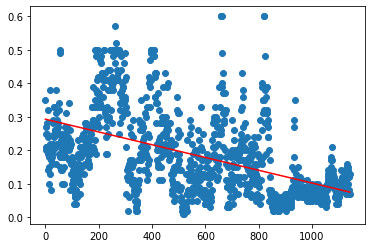

In [10]:
X = np.arange(len(target)).reshape(-1, 1)
Y = target.ts.values
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')